# Lecture 2: Reaction Kinetics

This second lecture focuses on solving the rate of a chemical reaction.

## Data

The following data is obtained:

| *t* (d)       | 0 |  1 | 3 | 5 | 10 | 15 | 20 |
|:--------------|:-:|:--:|:-:|:-:|:--:|:--:|:--:|
| _c_ (mg/L)    | 12|10.7| 9 |7.1| 4.6| 2.5| 1.8|

## The integral method

First the data is plotted to identify the order of reaction

Text(0, 0.5, '1/c')

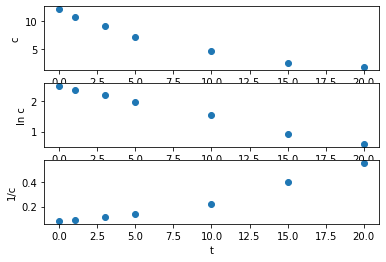

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import math

t = [0, 1, 3, 5, 10, 15, 20]
c = [12, 10.7, 9, 7.1, 4.6, 2.5, 1.8]
lnc = [math.log(ci) for ci in c]
invc = [1/ci for ci in c]

plt.subplot(3,1,1)
plt.plot(t, c, 'o')
plt.xlabel('t')
plt.ylabel('c')

plt.subplot(3,1,2)
plt.plot(t, lnc, 'o')
plt.xlabel('t')
plt.ylabel('ln c')

plt.subplot(3,1,3)
plt.plot(t, invc, 'o')
plt.xlabel('t')
plt.ylabel('1/c')

Clearly the second chart best represent a linear trend. Therefore the reaction is first-order.
The linear equation can be found using `numpy`'s `polyfit` function.

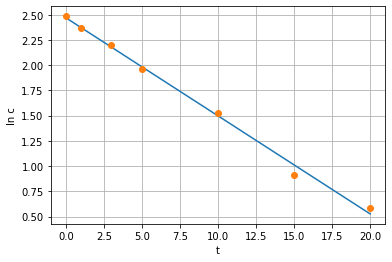

In [3]:
import numpy as np

coeffs = np.polyfit(t, lnc, 1)
plt.plot(t, np.poly1d(coeffs)(t))
plt.plot(t, lnc, 'o')
plt.xlabel('t')
plt.ylabel('ln c')
plt.grid()

The (fitting) model is

$$ c = c_0 \exp(-kt) $$

where

In [4]:
print("c0 = ", math.exp(coeffs[1]))
print("k = ", -coeffs[0])

c0 =  11.823696015955575
k =  0.0971877061245633


## The differential method

In this method the original ODE

$$ \frac{dc}{dt} = - kc^n $$

is transformed to

$$ \log\left(-\frac{dc}{dt}\right) = \log k + n \log c $$

First we approximate the derivative numerically following the code below. Noted that `dcdt` is actually $-dc/dt$.

[1.3000000000000007, 0.8499999999999996, 0.9500000000000002, 0.5, 0.41999999999999993, 0.13999999999999999, 0]
[1.25, 1.0750000000000002, 0.8999999999999999, 0.7250000000000001, 0.45999999999999996, 0.27999999999999997, 0.15]


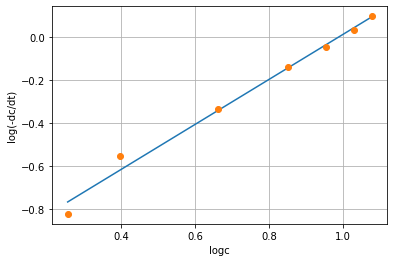

In [21]:
diff = [0] * len(t)
dcdt = [0] * len(t)

for i in range(len(t)-1):
    diff[i] = -(c[i+1] - c[i])/(t[i+1] - t[i])
    
for i in range(1,len(t)-1):
    dcdt[i] = (diff[i-1] + diff[i]) / 2

# A natural choice for boundary values
# dcdt[0] = dcdt[1]
# dcdt[-1] = dcdt[-2]

# Chapra chose differently using "equal-area" differentiation approach
dcdt[0] = 1.25
dcdt[-1] = 0.15

print(diff)
print(dcdt)

logc = [math.log10(ci) for ci in c]
logdcdt = [math.log10(dcdti) for dcdti in dcdt]

coeffs = np.polyfit(logc, logdcdt, 1)
plt.plot(logc, np.poly1d(coeffs)(logc))
plt.plot(logc, logdcdt, 'o')
plt.xlabel('logc')
plt.ylabel('log(-dc/dt)')
plt.grid()

In [20]:
print("n = ", coeffs[0])
print("k = ", 10**coeffs[1])

n =  1.047447726249774
k =  0.09212724415732945


## The integral/least-square method

The reader is encouraged to use a numerical libary to solve the problem. In Excel, for example, this can be achieved with the Solver tool. In this numerical approach, the goal is to minimized the root-mean-square error (RMSE) between the predicted values and the measured ones. 

Specifically for Excel,

+ _k_ = 0.091528
+ _n_ = 1.044425
+ RMSE = 0.39378

## Temperature effects

The reaction rates can be related between two different temperatures as following:

$$ \frac{k(T_2)}{k(T_1)} = \theta^{T_2 - T_1} $$

where the constant $\theta$ is:

$$ \theta = \exp \left(\frac{E}{R T_{a2} T_{a1}} \right) $$

### Example 2.5

+ _T_<sub>1</sub> = 4&deg;C, _k_<sub>1</sub> = 0.12 d<sup>-1</sup>
+ _T_<sub>2</sub> = 16&deg;C, _k_<sub>2</sub> = 0.20 d<sup>-1</sup>

In [26]:
T1 = 4; k1 = 0.12
T2 = 16; k2 = 0.2
theta = (k2/k1)**(1/(T2-T1))
k20 = k2 * theta**(20 - T2)
print("θ = ", theta)
print("k(20) = ", k20)

θ =  1.0434878479345138
k(20) =  0.2371262202993375


&theta;